In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros((X.shape[1],))
        self.bias = 0

        # Training using gradient descent
        for epoch in range(self.epochs):
            # Make predictions
            predictions = self.predict(X)

            # Compute gradients
            gradient_weights = -(2/X.shape[0]) * np.dot(X.T, (y - predictions))
            gradient_bias = -(2/X.shape[0]) * np.sum(y - predictions)

            # Update weights and bias
            self.weights = self.weights - self.learning_rate * gradient_weights
            self.bias = self.bias - self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


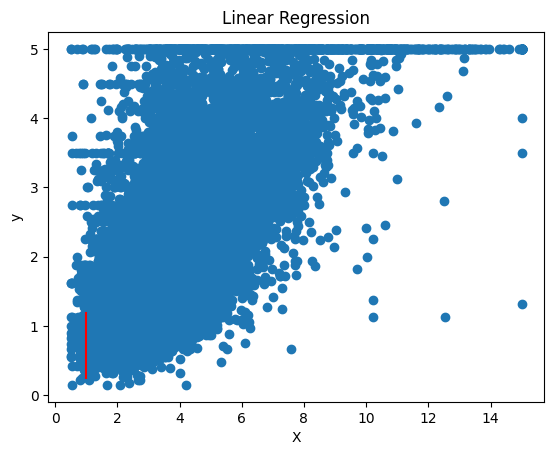

In [7]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Normalize features (excluding bias term)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Create and train the Linear Regression Model
lr_model = LinearRegression(learning_rate=0.01, epochs=10)
lr_model.train(X_b, y)

# Make predictions
X_new = np.array([[0, 1, 0, 0, 0, 0, 0, 0], [2, 1, 0, 0, 0, 0, 0, 0]])  # Ensure 8 features
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]

# Ensure X_new_b has the correct number of features
X_new_b = X_new_b[:, :X_b.shape[1]]

# Make predictions
y_predict = lr_model.predict(X_new_b)

# Plot the data and the Linear Regression line
plt.scatter(X[:, 0], y)
plt.plot(X_new[:, 1], y_predict, "r-")  # Assuming X[:, 0] is used for plotting
plt.xlabel("X")
plt.ylabel("y")
plt.title('Linear Regression')
plt.show()